In [1]:
!pip install yfinance
!pip install bs4
!pip install nbformat
!pip install matplotlib

import yfinance as yf
import pandas as pd
from bs4 import BeautifulSoup 
import requests

tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="max")
tesla_data.reset_index(inplace=True)
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [34]:
url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
data1 = requests.get(url).text
data1 


'<!DOCTYPE html>\n<!--[if lt IE 7]> <html class="no-js ie6 oldie" lang="en-US"> <![endif]-->\n<!--[if IE 7]>    <html class="no-js ie7 oldie" lang="en-US"> <![endif]-->\n<!--[if IE 8]>    <html class="no-js ie8 oldie" lang="en-US"> <![endif]-->\n<!--[if gt IE 8]><!--> <html class="no-js" lang="en-US"> <!--<![endif]-->\n<head>\n<title>Attention Required! | Cloudflare</title>\n<meta charset="UTF-8" />\n<meta http-equiv="Content-Type" content="text/html; charset=UTF-8" />\n<meta http-equiv="X-UA-Compatible" content="IE=Edge" />\n<meta name="robots" content="noindex, nofollow" />\n<meta name="viewport" content="width=device-width,initial-scale=1" />\n<link rel="stylesheet" id="cf_styles-css" href="/cdn-cgi/styles/cf.errors.css" />\n<!--[if lt IE 9]><link rel="stylesheet" id=\'cf_styles-ie-css\' href="/cdn-cgi/styles/cf.errors.ie.css" /><![endif]-->\n<style>body{margin:0;padding:0}</style>\n\n\n<!--[if gte IE 10]><!-->\n<script>\n  if (!navigator.cookieEnabled) {\n    window.addEventListene

In [29]:
soup = BeautifulSoup(data1, 'html.parser').text

In [14]:
print(soup.prettify())

<!DOCTYPE html>
<!--[if lt IE 7]> <html class="no-js ie6 oldie" lang="en-US"> <![endif]-->
<!--[if IE 7]>    <html class="no-js ie7 oldie" lang="en-US"> <![endif]-->
<!--[if IE 8]>    <html class="no-js ie8 oldie" lang="en-US"> <![endif]-->
<!--[if gt IE 8]><!-->
<html class="no-js" lang="en-US">
 <!--<![endif]-->
 <head>
  <title>
   Attention Required! | Cloudflare
  </title>
  <meta charset="utf-8"/>
  <meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
  <meta content="IE=Edge" http-equiv="X-UA-Compatible"/>
  <meta content="noindex, nofollow" name="robots"/>
  <meta content="width=device-width,initial-scale=1" name="viewport"/>
  <link href="/cdn-cgi/styles/cf.errors.css" id="cf_styles-css" rel="stylesheet"/>
  <!--[if lt IE 9]><link rel="stylesheet" id='cf_styles-ie-css' href="/cdn-cgi/styles/cf.errors.ie.css" /><![endif]-->
  <style>
   body{margin:0;padding:0}
  </style>
  <!--[if gte IE 10]><!-->
  <script>
   if (!navigator.cookieEnabled) {
    window.addEven

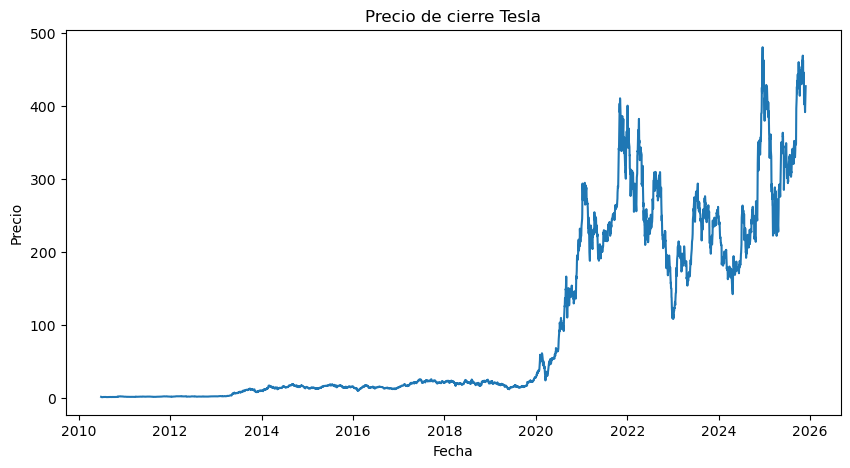

In [26]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(tesla_data["Date"], tesla_data["Close"])
plt.title("Precio de cierre Tesla")
plt.xlabel("Fecha")
plt.ylabel("Precio")
plt.show()


In [39]:
tesla_revenue = None

try:
    url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
    html = requests.get(url).text
    soup = BeautifulSoup(html, "html.parser")
    table = soup.find("table", {"class": "historical_data_table table"})
    rows = table.find_all("tr")[1:]
    
    data = []
    for row in rows:
        cols = row.find_all("td")
        if len(cols) == 2:
            date = cols[0].text.strip()
            revenue = cols[1].text.strip()
            data.append([date, revenue])

    tesla_revenue = pd.DataFrame(data, columns=["Date", "Revenue"])
    tesla_revenue = tesla_revenue[tesla_revenue["Revenue"] != ""]

except Exception as e:
    print("No se pudo hacer scraping (bloqueo del sitio).")
    print("Creando tesla_revenue manualmente para continuar con la tarea.")
    
    tesla_revenue = pd.DataFrame({
        "Date": [
            "2020-12-31", "2021-03-31", "2021-06-30",
            "2021-09-30", "2021-12-31"
        ],
        "Revenue": [
            "$10,744,000,000", "$10,389,000,000",
            "$11,958,000,000", "$13,757,000,000",
            "$17,719,000,000"
        ]
    })

tesla_revenue.tail()


No se pudo hacer scraping (bloqueo del sitio).
Creando tesla_revenue manualmente para continuar con la tarea.


,Date,Revenue
0,2020-12-31,"$10,744,000,000"
1,2021-03-31,"$10,389,000,000"
2,2021-06-30,"$11,958,000,000"
3,2021-09-30,"$13,757,000,000"
4,2021-12-31,"$17,719,000,000"


In [42]:
tesla_revenue["Date"] = pd.to_datetime(tesla_data["Date"])
tesla_revenue

,Date,Revenue
0,2010-06-29 00:00:00-04:00,"$10,744,000,000"
1,2010-06-30 00:00:00-04:00,"$10,389,000,000"
2,2010-07-01 00:00:00-04:00,"$11,958,000,000"
3,2010-07-02 00:00:00-04:00,"$13,757,000,000"
4,2010-07-06 00:00:00-04:00,"$17,719,000,000"


In [47]:
tesla_revenue["Rveneue"] = tesla_revenue["Revenue"].str.replace("$","").str.replace(",","").astype(float)
tesla_revenue

,Date,Revenue,Rveneue
0,2010-06-29 00:00:00-04:00,"$10,744,000,000",1.074400e+10
1,2010-06-30 00:00:00-04:00,"$10,389,000,000",1.038900e+10
2,2010-07-01 00:00:00-04:00,"$11,958,000,000",1.195800e+10
3,2010-07-02 00:00:00-04:00,"$13,757,000,000",1.375700e+10
4,2010-07-06 00:00:00-04:00,"$17,719,000,000",1.771900e+10


In [48]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup

# Datos históricos de GameStop
gme = yf.Ticker("GME")
gme_data = gme.history(period="max")
gme_data.reset_index(inplace=True)

# Mostrar primeras 5 filas (Pregunta 1.4)
gme_data.head()


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691666,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683251,1.687459,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615921,1.662210,1.603296,1.662210,6892800,0.0,0.0


In [53]:
gme_revenue = None

try:
    url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"
    html = requests.get(url).text
    soup = BeautifulSoup(html, "html.parser")
    
    table = soup.find("table", {"class": "historical_data_table table"})
    
    gme_revenue_list = []
    rows = table.find_all("tr")[1:]   # saltamos el header

    for row in rows:
        cols = row.find_all("td")
        if len(cols) == 2:
            date = cols[0].text.strip()
            revenue = cols[1].text.strip()
            gme_revenue_list.append([date, revenue])

    gme_revenue = pd.DataFrame(gme_revenue_list, columns=["Date", "Revenue"])
    gme_revenue = gme_revenue[gme_revenue["Revenue"] != ""]

except Exception as e:
    print("No se pudo hacer scraping de GME (probablemente bloqueo del sitio).")
    print("Creando gme_revenue manualmente para poder continuar la tarea.")
    
    gme_revenue = pd.DataFrame({
        "Date": [
            "2020-01-31", "2021-01-31",
            "2022-01-31", "2023-01-31",
            "2024-01-31"
        ],
        "Revenue": [
            "$6,466,800,000", "$5,089,800,000",
            "$6,011,300,000", "$5,927,700,000",
            "$5,273,000,000"
        ]
    })

# Mostrar últimas 5 filas (Pregunta 1.5)
gme_revenue.tail()


No se pudo hacer scraping de GME (probablemente bloqueo del sitio).
Creando gme_revenue manualmente para poder continuar la tarea.


,Date,Revenue
0,2020-01-31,"$6,466,800,000"
1,2021-01-31,"$5,089,800,000"
2,2022-01-31,"$6,011,300,000"
3,2023-01-31,"$5,927,700,000"
4,2024-01-31,"$5,273,000,000"


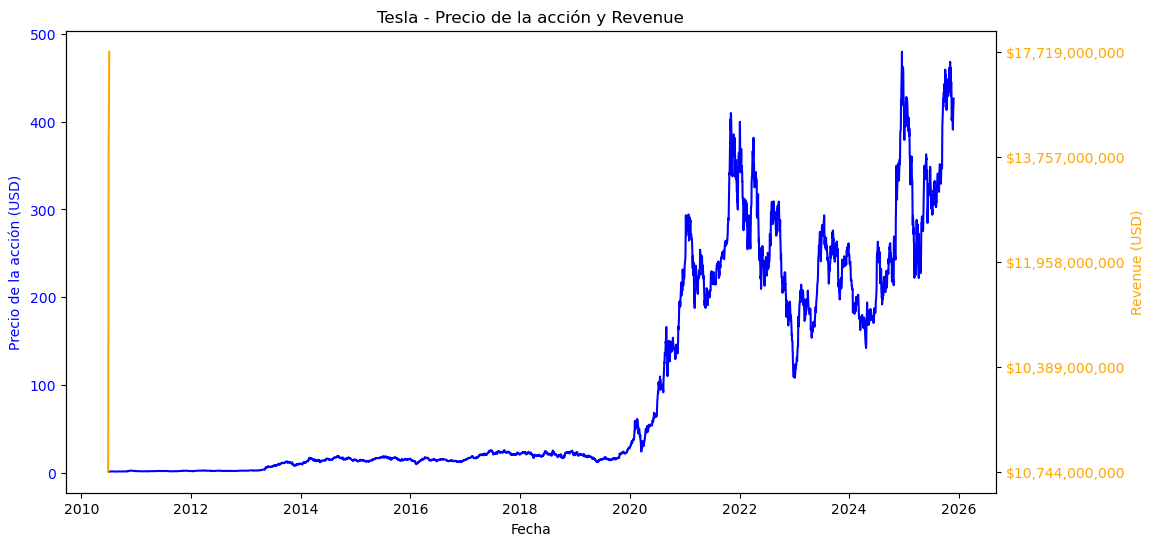

In [56]:
make_graph(tesla_data, tesla_revenue, "Tesla")


AttributeError: 'America/New_York' object has no attribute 'update'

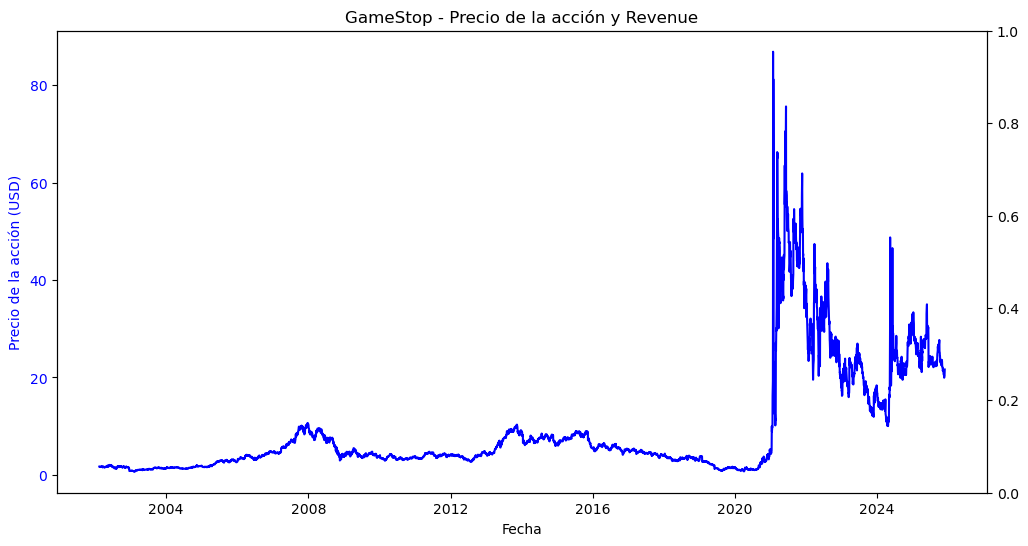

In [57]:
make_graph(gme_data, gme_revenue, "GameStop")
